In [1]:
#• Objective:
#• Implement Uniform Cost Search for a weighted graph.
#• Problem Statement: Given a weighted graph (e.g., a transportation network with travel costs),
#find the minimum-cost path between two nodes.

#• Tasks:
#1. Represent the graph as an adjacency list.
#2. Implement Uniform Cost Search to find the optimal path.
#3. Compare it with BFS for unweighted graphs.

In [5]:
import heapq
from collections import deque

def uniform_cost_search(graph, start, goal):
    priority_queue = []
    heapq.heappush(priority_queue, (0, start, [])) 
    visited = set()
    
    while priority_queue:
        cost, node, path = heapq.heappop(priority_queue)
        
        if node in visited:
            continue
        
        path = path + [node]
        visited.add(node)
        
        if node == goal:
            return cost, path
        
        for neighbor, weight in graph.get(node, []):
            if neighbor not in visited:
                heapq.heappush(priority_queue, (cost + weight, neighbor, path))
    
    return float("inf"), [] 

def bfs_unweighted(graph, start, goal):
    queue = deque([(start, [start])])
    visited = set()
    
    while queue:
        node, path = queue.popleft()
        
        if node == goal:
            return path
        
        if node in visited:
            continue
        
        visited.add(node)
        
        for neighbor in graph.get(node, []):
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))
    
    return []

graph_weighted = {
    'A': [('B', 1), ('C', 4)],
    'B': [('C', 2), ('D', 5)],
    'C': [('D', 1)],
    'D': []
}

graph_unweighted = {
    'A': ['B', 'C'],
    'B': ['C', 'D'],
    'C': ['D'],
    'D': []
}

ucs_cost, ucs_path = uniform_cost_search(graph_weighted, 'A', 'D')
print("Uniform Cost Search:", ucs_cost, ucs_path)

bfs_path = bfs_unweighted(graph_unweighted, 'A', 'D')
print("BFS (Unweighted Graph):", bfs_path)

Uniform Cost Search: 4 ['A', 'B', 'C', 'D']
BFS (Unweighted Graph): ['A', 'B', 'D']


Uniform Cost Search: 4 ['A', 'B', 'C', 'D']
BFS (Unweighted Graph): ['A', 'B', 'D']


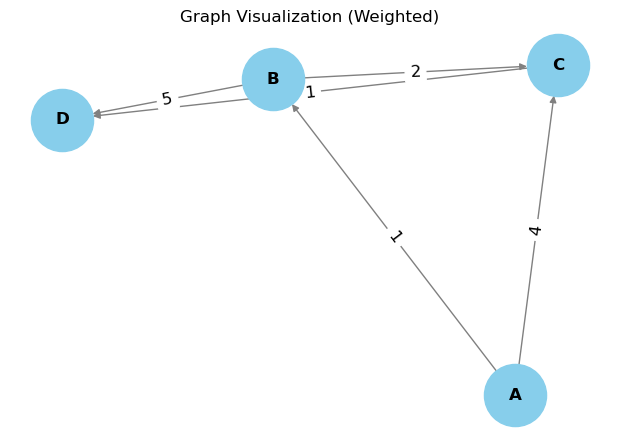

In [13]:
import heapq
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

def uniform_cost_search(graph, start, goal):
    priority_queue = []
    heapq.heappush(priority_queue, (0, start, [])) 
    visited = set()
    
    while priority_queue:
        cost, node, path = heapq.heappop(priority_queue)
        
        if node in visited:
            continue
        
        path = path + [node]
        visited.add(node)
        
        if node == goal:
            return cost, path
        
        for neighbor, weight in graph.get(node, []):
            if neighbor not in visited:
                heapq.heappush(priority_queue, (cost + weight, neighbor, path))
    
    return float("inf"), [] 

def bfs_unweighted(graph, start, goal):
    queue = deque([(start, [start])])
    visited = set()
    
    while queue:
        node, path = queue.popleft()
        
        if node == goal:
            return path
        
        if node in visited:
            continue
        
        visited.add(node)
        
        for neighbor in graph.get(node, []):
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))
    
    return []

graph_weighted = {
    'A': [('B', 1), ('C', 4)],
    'B': [('C', 2), ('D', 5)],
    'C': [('D', 1)],
    'D': []
}

graph_unweighted = {
    'A': ['B', 'C'],
    'B': ['C', 'D'],
    'C': ['D'],
    'D': []
}

ucs_cost, ucs_path = uniform_cost_search(graph_weighted, 'A', 'D')
print("Uniform Cost Search:", ucs_cost, ucs_path)

bfs_path = bfs_unweighted(graph_unweighted, 'A', 'D')
print("BFS (Unweighted Graph):", bfs_path)

def draw_graph(graph, weighted=False):
    G = nx.DiGraph()

    if weighted:
        for node, edges in graph.items():
            for neighbor, weight in edges:
                G.add_edge(node, neighbor, weight=weight)
    else:
        for node, neighbors in graph.items():
            for neighbor in neighbors:
                G.add_edge(node, neighbor)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=2000, font_size=12, font_weight="bold", arrows=True)
    
    if weighted:
        edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

    plt.title("Graph Visualization" + (" (Weighted)" if weighted else " (Unweighted)"))
    plt.show()

draw_graph(graph_weighted, weighted=True)
